In [1]:
import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')

### 1. 데이터프레임 설명

#### (1) 큐시트 : 광고방송스케쥴

In [2]:
cue_sheet = pd.read_excel("./datas/Cuesheet.xlsx",'①큐시트')
cue_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45332 entries, 0 to 45331
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Station     45332 non-null  object        
 1   Programme   45332 non-null  object        
 2   Time        45332 non-null  object        
 3   Daypart     45332 non-null  object        
 4   Class       44604 non-null  object        
 5   Secs        45332 non-null  int64         
 6   Kinds       44215 non-null  object        
 7   Unit price  45312 non-null  float64       
 8   Bonus rate  45332 non-null  float64       
 9   Net price   45332 non-null  float64       
 10  Insertion   45332 non-null  int64         
 11  Ad value    45332 non-null  float64       
 12  Cost        45332 non-null  float64       
 13  Date        45332 non-null  datetime64[ns]
 14  Film        45332 non-null  object        
 15  연월          45332 non-null  object        
dtypes: datetime64[ns](1), 

In [3]:
cue_sheet.tail(1)

Station Programme   Time Daypart Class  Secs Kinds  Unit price  \
45331   EBS-2  2-2149-4  21:49    21시대     A    60   NaN   1080000.0   

       Bonus rate      Net price  Insertion   Ad value           Cost  \
45331       3.204  337078.651685          1  1080000.0  337078.651685   

            Date     Film     연월  
45331 2020-12-31  JUST 신구  2012월

#### (2) 후원내역

In [4]:
donour = pd.read_excel("./datas/Donour.xlsx",'②후원내역')
donour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34840 entries, 0 to 34839
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     34840 non-null  datetime64[ns]
 1   Time     34840 non-null  object        
 2   Daypart  34840 non-null  object        
 3   Dnis     34840 non-null  object        
 4   Station  34840 non-null  object        
 5   I/B콜수    34840 non-null  int64         
 6   응대호      34840 non-null  int64         
 7   정기후원     34840 non-null  int64         
 8   후원금액     34840 non-null  int64         
 9   Film     32258 non-null  object        
 10  연월       34840 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 2.9+ MB


In [5]:
donour.tail(1)

Date      Time Daypart       Dnis Station  I/B콜수  응대호  정기후원  \
34839 2020-12-20  21:15:00    21시대  1899-0519    더라이프      1    1     1   

        후원금액    Film     연월  
34839  25000  난방비 소정  2012월

#### (3) 송출내역
- 아래파일들은 Concat되엇 하나의 파일으로 정리되어야함

In [6]:
rating_18_1 = pd.read_excel("./datas/Rating_18-1.xlsx",'③송출내역-18년-1')
rating_18_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8762 entries, 0 to 8761
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Station    8762 non-null   object        
 1   Date       8762 non-null   datetime64[ns]
 2   Time       8762 non-null   object        
 3   Secs       8762 non-null   int64         
 4   Film       8762 non-null   object        
 5   Programme  8762 non-null   object        
 6   Genre      8762 non-null   object        
 7   Net Price  8762 non-null   float64       
 8   Cost       8762 non-null   float64       
 9   Audience   8762 non-null   float64       
 10  Salehouse  0 non-null      float64       
 11  promocode  0 non-null      float64       
 12  pib        8762 non-null   object        
 13  pip        8762 non-null   object        
 14  origin     0 non-null      float64       
 15  telno      0 non-null      float64       
 16  SPOT       8762 non-null   int64         


In [7]:
rating_18_1.tail(1)

Station       Date      Time  Secs  Film         Programme  \
8761  skyTravel(sms) 2018-01-30  22:46:55    60  모래벼룩  세남자의짠한여행술로라이프조지아   

            Genre     Net Price          Cost  Audience  Salehouse  promocode  \
8761  Dacumentary  28248.587571  31073.446328       0.0        NaN        NaN   

      pib    pip  origin  telno  SPOT Daypart     연월  
8761  Pre  start     NaN    NaN     1    22시대  1801월

In [8]:
rating_18_2 = pd.read_excel("./datas/Rating_18-2.xlsx",'③송출내역-18년-2')
rating_18_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7555 entries, 0 to 7554
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Station    7555 non-null   object        
 1   Date       7555 non-null   datetime64[ns]
 2   Time       7555 non-null   object        
 3   Secs       7555 non-null   int64         
 4   Film       7555 non-null   object        
 5   Programme  7555 non-null   object        
 6   Genre      7555 non-null   object        
 7   Net Price  7555 non-null   float64       
 8   Cost       7555 non-null   float64       
 9   Audience   7555 non-null   float64       
 10  Salehouse  0 non-null      float64       
 11  promocode  0 non-null      float64       
 12  pib        7555 non-null   object        
 13  pip        7555 non-null   object        
 14  origin     0 non-null      float64       
 15  telno      0 non-null      float64       
 16  SPOT       7555 non-null   int64         


In [9]:
rating_18_2.tail(1)

Station       Date      Time  Secs  Film Programme     Genre  Net Price  \
7554  하이라이트TV 2018-07-17  21:36:00    60  아동학대       캠페인  Campaign        0.0   

      Cost  Audience  Salehouse  promocode pib     pip  origin  telno  SPOT  \
7554   0.0       0.0        NaN        NaN  SB  middle     NaN    NaN     1   

     Daypart     연월  
7554    21시대  1807월

In [10]:
rating_19 = pd.read_excel("./datas/Rating_19.xlsx",'③송출내역-19년')
rating_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14869 entries, 0 to 14868
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Station    14869 non-null  object        
 1   Date       14869 non-null  datetime64[ns]
 2   Time       14869 non-null  object        
 3   Secs       14869 non-null  int64         
 4   Film       14869 non-null  object        
 5   Programme  14869 non-null  object        
 6   Genre      14869 non-null  object        
 7   Net Price  14869 non-null  float64       
 8   Cost       14869 non-null  float64       
 9   Audience   14869 non-null  float64       
 10  Salehouse  0 non-null      float64       
 11  promocode  0 non-null      float64       
 12  pib        14869 non-null  object        
 13  pip        14164 non-null  object        
 14  origin     0 non-null      float64       
 15  telno      0 non-null      float64       
 16  SPOT       14869 non-null  int64        

In [11]:
rating_19.tail(1)

Station       Date      Time  Secs Film Programme     Genre  \
14868    CNTV 2019-01-31  20:58:00    60  난방비       캠페인  Campaign   

          Net Price          Cost     Audience  Salehouse  promocode pib  \
14868  68954.949433  75850.444376  6895.494943        NaN        NaN  SB   

          pip  origin  telno  SPOT Daypart     연월  
14868  middle     NaN    NaN     1    20시대  1901월

In [12]:
rating_20 = pd.read_excel("./datas/Rating_20.xlsx",'③송출내역-20년')
rating_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17246 entries, 0 to 17245
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Station    17246 non-null  object        
 1   Date       17246 non-null  datetime64[ns]
 2   Time       17246 non-null  object        
 3   Secs       17246 non-null  int64         
 4   Film       17246 non-null  object        
 5   Programme  17246 non-null  object        
 6   Genre      17151 non-null  object        
 7   Net Price  17246 non-null  float64       
 8   Cost       17246 non-null  float64       
 9   Audience   17246 non-null  float64       
 10  Salehouse  0 non-null      float64       
 11  promocode  0 non-null      float64       
 12  pib        17246 non-null  object        
 13  pip        16638 non-null  object        
 14  origin     0 non-null      float64       
 15  telno      0 non-null      float64       
 16  SPOT       17246 non-null  int64        

### 2. 분석을 위한 컬럼들

#### (1) Features
- rating_20["Audience"] : 시청자수
- rating_20["SPOT"] : 광고송출횟수
- rating 18~20까지 Concat된 자료필요

#### (2) Label
- Donour["I/B콜수"] : 콜수
- Donour["정기후원"] : 정기후원건수
- Donour["후원금액"] : 후원금액

#### (3) Filter
- 채널
- 기간 : 월별, 요일별
- film(광고소재별)

In [13]:
# baseline 데이터만들기

In [14]:
# rating

In [15]:
rating = pd.concat([rating_18_1, rating_18_2, rating_19, rating_20], axis = 0).reset_index()
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48432 entries, 0 to 48431
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      48432 non-null  int64         
 1   Station    48432 non-null  object        
 2   Date       48432 non-null  datetime64[ns]
 3   Time       48432 non-null  object        
 4   Secs       48432 non-null  int64         
 5   Film       48432 non-null  object        
 6   Programme  48432 non-null  object        
 7   Genre      48337 non-null  object        
 8   Net Price  48432 non-null  float64       
 9   Cost       48432 non-null  float64       
 10  Audience   48432 non-null  float64       
 11  Salehouse  0 non-null      float64       
 12  promocode  0 non-null      float64       
 13  pib        48432 non-null  object        
 14  pip        47119 non-null  object        
 15  origin     0 non-null      float64       
 16  telno      0 non-null      float64      

In [16]:
rating.tail(1)

index Station       Date      Time  Secs        Film Programme  \
48431  17245    CNTV 2020-12-15  20:51:00    60  안정환 조손가정소재    제빵왕김탁구   

                      Genre     Net Price          Cost     Audience  \
48431  Drama:Series/Serials  66666.666667  73333.333333  6666.666667   

       Salehouse  promocode  pib  pip  origin  telno  SPOT Daypart     연월  
48431        NaN        NaN  Pre  top     NaN    NaN     1    20시대  2012월

In [17]:
rating.head()

index   Station       Date      Time  Secs            Film Programme  \
0      0       GTV 2018-06-10  07:45:26    60  Kayembe-KRW20k   속풀이쇼동치미   
1      1       GTV 2018-06-03  07:45:36    60  Kayembe-KRW20k   속풀이쇼동치미   
2      2  SkyDrama 2018-06-04  08:17:18    60  Kayembe-KRW20k     7일의왕비   
3      3    EDGETV 2018-06-02  08:25:53    60            아동학대       캠페인   
4      4    EDGETV 2018-06-10  08:26:01    60            아동학대       캠페인   

                  Genre      Net Price           Cost      Audience  \
0         Ent:Talk show   30354.131535   33389.544688      0.000000   
1         Ent:Talk show   30354.131535   33389.544688      0.000000   
2  Drama:Series/Serials  148936.170213  163829.787234   4410.000000   
3              Campaign  128205.128205  141025.641026  12820.512821   
4              Campaign  128205.128205  141025.641026  12820.512821   

   Salehouse  promocode   pib     pip  origin  telno  SPOT Daypart     연월  
0        NaN        NaN   Pre     end     NaN    NaN     1    07시대  1806월  
1        NaN        NaN   Pre     end     NaN    NaN     1    07시대  1806월  
2        NaN        NaN  Post     end     NaN    NaN     1    08시대  1806월  
3        NaN        NaN    SB  middle     NaN    NaN     1    08시대  1806월  
4        NaN        NaN    SB  middle     NaN    NaN     1    08시대  1806월

In [18]:
ch2 = rating[["Station"]].groupby("Station").sum().reset_index()
ch2.head(100)

Station
0       BBS
1       BTN
2       CBS
3     CBS_a
4     CBS_b
..      ...
64   채널A플러스
65      채널J
66    채널차이나
67     평화방송
68  하이라이트TV

[69 rows x 1 columns]

In [19]:
df1 = rating[["Date","Net Price", "Audience", "SPOT"]]

In [20]:
df_features = df1.groupby("Date").sum().reset_index()
df_features.tail(1)

Date      Net Price      Audience  SPOT
1077 2020-12-15  133333.333333  13333.333333     4

In [21]:
df2 = donour[["Date","I/B콜수", "응대호", "정기후원","후원금액"]]

In [22]:
df_targets = df2.groupby("Date").sum().reset_index()
df_targets.tail(1)

Date  I/B콜수  응대호  정기후원    후원금액
1079 2020-12-20    100   89    40  900000

In [23]:
datas_1 = pd.merge(df_features, df_targets, how='inner', on='Date')
datas_1

Date     Net Price      Audience  SPOT  I/B콜수  응대호  정기후원    후원금액
0    2018-01-01  2.259887e+05  8.228300e+04     9      0    0     1   20000
1    2018-01-02  3.210825e+06  4.481416e+05    49     30   29    16  370000
2    2018-01-03  3.153477e+06  3.807346e+05    48     39   36    11  390000
3    2018-01-04  4.206834e+06  3.993495e+05    58     44   40    16  330000
4    2018-01-05  3.575503e+06  5.976845e+05    59     41   40    14  300000
...         ...           ...           ...   ...    ...  ...   ...     ...
1069 2020-12-11  5.060139e+06  9.572532e+05    70     49   46    16  300000
1070 2020-12-12  7.065465e+06  1.674320e+06    74     78   65    20  480000
1071 2020-12-13  7.897055e+06  2.103632e+06    91    108   97    31  650000
1072 2020-12-14  2.666667e+05  2.666667e+04     4     54   46    16  315000
1073 2020-12-15  1.333333e+05  1.333333e+04     4     48   47    17  380000

[1074 rows x 8 columns]

In [24]:
%matplotlib inline
%config InlineBacked.figure_format = {'png', 'retina'}

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

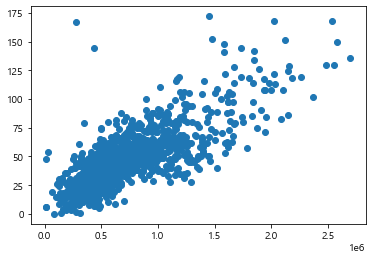

In [26]:
# Impression이 커질수록 I/B 콜이 커지는 경향성을 보임
x1 = datas_1["Audience"]
y1 = datas_1["I/B콜수"]
plt.scatter(x1, y1)
plt.show()

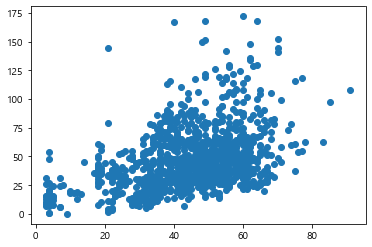

In [27]:
# SPOT의 경우 Impression 대비 I/B의 분포가 커지는 경향
x2 = datas_1["SPOT"]
plt.scatter(x2, y1)
plt.show()

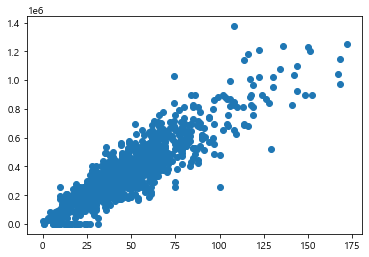

In [28]:
# 콜수가 많아지면 후원금액이 많아진다.
x3 = datas_1["I/B콜수"]
y2 = datas_1["정기후원"]
y3 = datas_1["후원금액"]
plt.scatter(x3, y3)
plt.show()

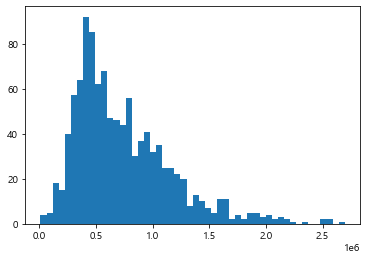

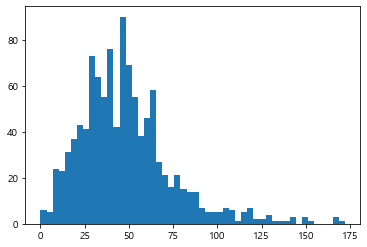

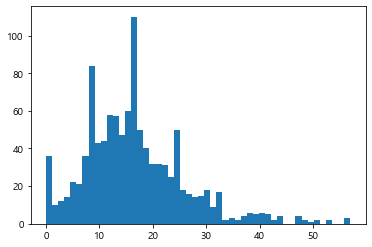

In [29]:
#impression
plt.hist(x1,50)
plt.show()

# 콜수
plt.hist(y1,50)
plt.show()

# 후원건수
plt.hist(y2,50)
plt.show()

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\distributions.py

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


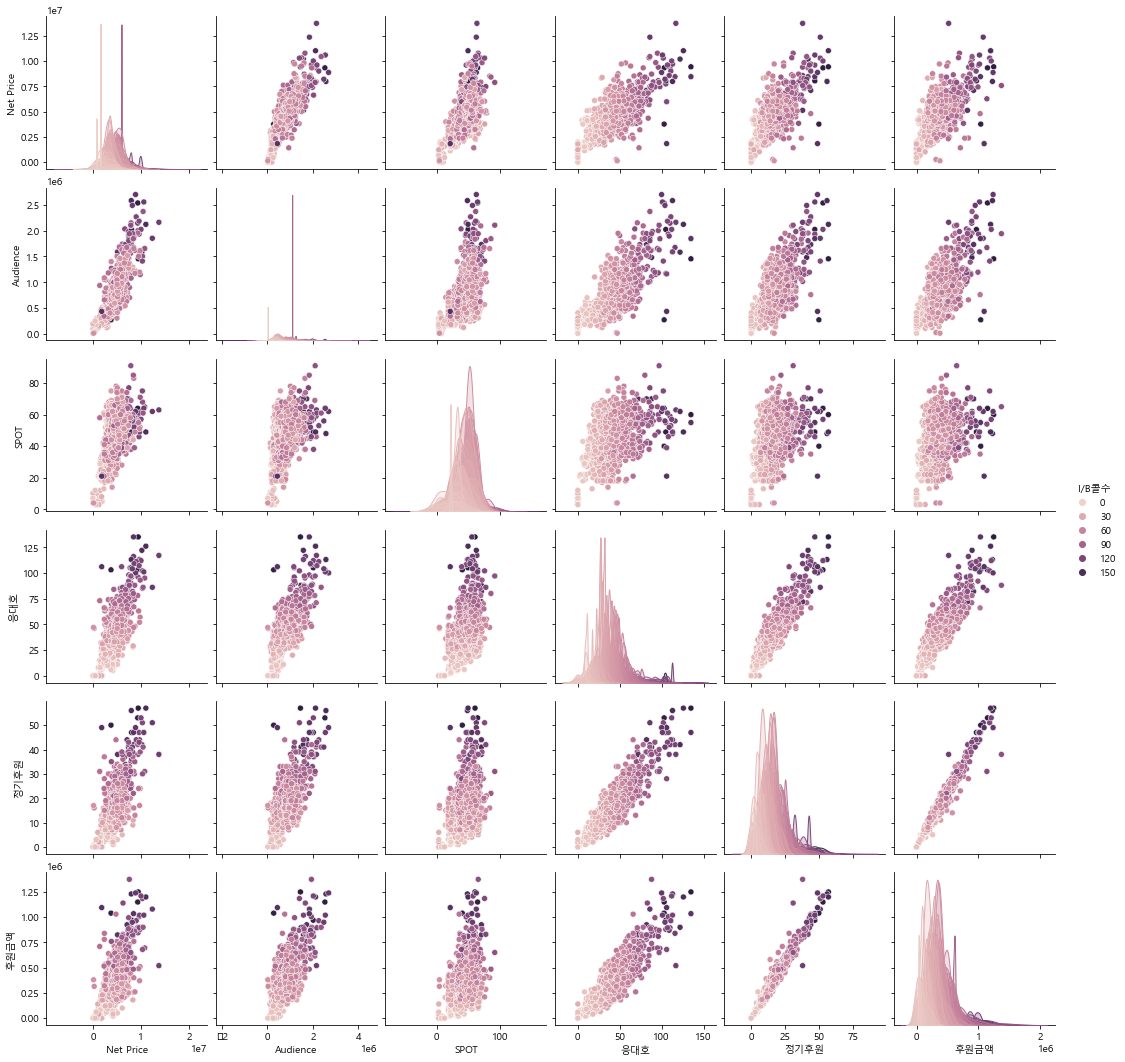

In [30]:
sns.pairplot(datas_1, hue="I/B콜수")
plt.show()

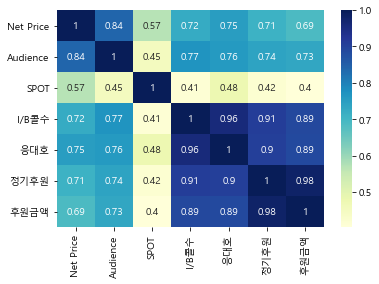

In [31]:
sns.heatmap(datas_1.corr(), cmap="YlGnBu", annot=True)
plt.show()

- Audience는 I/B콜수, 응대호, 정기후원, 후원금액 등의 label과의
  상관계수 높으며 양의 상관관계

In [32]:
import plotly.express as px
import plotly.graph_objects as go

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(y=y1, x = datas_1['Date'])) # I/B콜수
fig.add_trace(go.Bar(y=y2, x = datas_1['Date'])) # 후원건수
fig.show()

fig.add_trace(go.Bar(y=x1, x = datas_1['Date'])) # Audience
fig.show()

In [34]:
fig = go.Figure()
fig.add_trace(go.Box(y=x1, name='Audience')) # Audience
fig.show()

In [35]:
fig = go.Figure()
fig.add_trace(go.Box(y=y1, name='콜수')) # I/B콜수
fig.add_trace(go.Box(y=y2, name='정기후원')) # 후원건수
fig.show()


In [36]:
datas_1.tail(1)

Date      Net Price      Audience  SPOT  I/B콜수  응대호  정기후원    후원금액
1073 2020-12-15  133333.333333  13333.333333     4     48   47    17  380000

In [37]:
# Audience - 정기후원

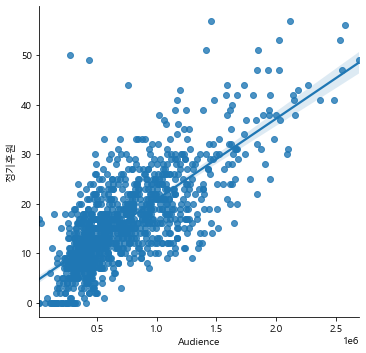

In [38]:
sns.lmplot(x='Audience', y='정기후원', data=datas_1)

In [39]:
# Audience - 콜수

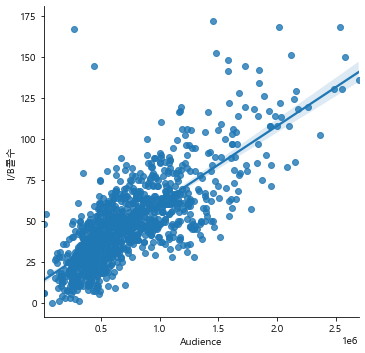

In [40]:
sns.lmplot(x='Audience', y='I/B콜수', data=datas_1)

In [41]:
# Audience - 콜수

In [42]:
import statsmodels.formula.api as smf
lm_model_1 = smf.ols(formula='y1~x1', data=datas_1).fit()

In [43]:
lm_model_1.params

Intercept    13.254018
x1            0.000047
dtype: float64

In [44]:
### 잔차평가

In [45]:
resid1 = lm_model_1.resid
resid1

0      -17.138743
1       -4.411573
2        7.770830
3       11.891990
4       -0.471754
          ...    
1069    -9.447625
1070   -14.301626
1071    -4.570163
1072    39.487002
1073    34.116492
Length: 1074, dtype: float64

In [46]:
### 결정계수

In [47]:
lm_model_1.rsquared

0.5929641478897554

In [48]:
### 잔차분포도

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 8722 missing from current font.



c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 8722 missing from current font.



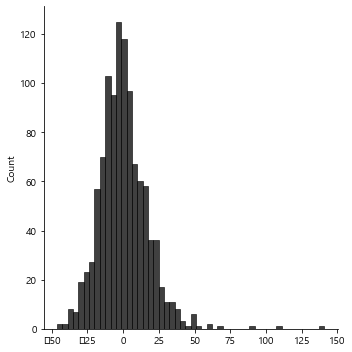

In [49]:
sns.displot(resid1, color='black')

In [50]:
# Audience - 정기후원

In [51]:
import statsmodels.formula.api as smf
lm_model_2 = smf.ols(formula='y2~x1', data=datas_1).fit()

In [52]:
lm_model_2.params

Intercept    4.524317
x1           0.000016
dtype: float64

In [53]:
### 잔차평가

In [54]:
resid2 = lm_model_2.resid
resid2

0       -4.867324
1        4.161200
2        0.261404
3        4.957576
4       -0.279610
          ...    
1069    -4.148423
1070   -11.852258
1071    -7.859395
1072    11.040435
1073    12.258059
Length: 1074, dtype: float64

In [55]:
### 결정계수

In [56]:
lm_model_2.rsquared

0.5477391227660323

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 8722 missing from current font.



c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 8722 missing from current font.



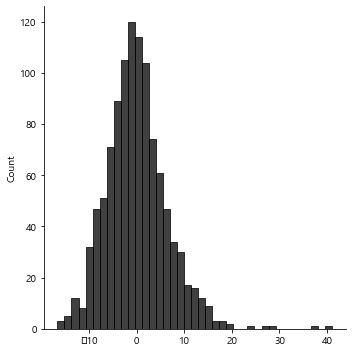

In [57]:
sns.displot(resid2, color='black')

----

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
### 1. Linear Regression을 이용한 콜수 및 후원건수 예측

In [60]:
#### 데이터를 train, test로 나누기

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=13)



In [62]:
### 선형회귀모델 만들기

In [63]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  I/B콜수   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              6378.
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                        0.00
Time:                        18:24:46   Log-Likelihood:                         -3220.5
No. Observations:                 751   AIC:                                      6443.
Df Residuals:                     750   BIC:                                      6448.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Audience    5.958e-05   7.46e-07     79.861      0.000    5.81e-05     6.1e-05
==============================================================================
Omnibus:                       75.858   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.214
Skew:                           0.329   Prob(JB):                     1.09e-75
Kurtosis:                       6.256   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
### 예측

In [65]:
predictions = lm.predict(X_test)
predictions

204    31.488383
337    36.683202
285    15.677024
747    55.608290
883    64.830934
         ...    
507    99.264513
261    17.677114
56     20.419968
256    28.733811
37     13.154684
Length: 323, dtype: float64

In [66]:
### 실제 test값

In [67]:
y_test

204    28
337    35
285    10
747    83
883    87
       ..
507    68
261    11
56     36
256     5
37     30
Name: I/B콜수, Length: 323, dtype: int64

In [68]:
### 참값의 직관적비교

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



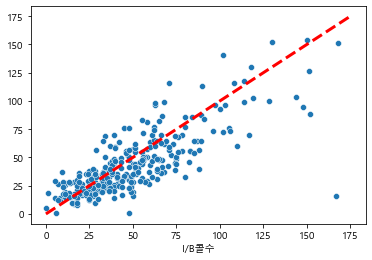

In [69]:
sns.scatterplot(y_test, predictions);
plt.plot([0,175], [0,175], 'r', ls='dashed', lw=3);

In [70]:
# 일단평가

In [71]:
from sklearn import metrics

In [72]:
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE 368.0389062676201
RMSE 19.18434013114916


In [73]:
# I/B콜수에 historgram

In [74]:
import plotly.express as px

fig = px.histogram(datas_1, x="I/B콜수")
fig.show()

In [75]:
## 각 특성별 상관계수 확인

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 53084 missing from current font.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 49688 missing from current font.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 51025 missing from current font.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45824 missing from current font.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 54840 missing from current font.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 51221 missing from current font.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\matplotlib\backends\backen

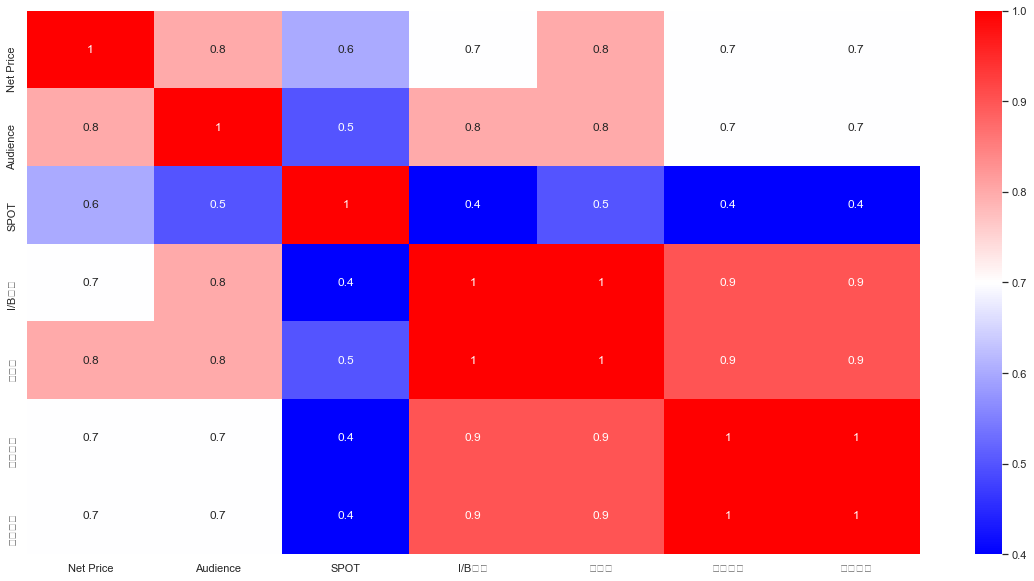

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import rc
rc('font', family='Malgun Gothic')

corr_mat = datas_1.corr().round(1)
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

In [77]:
# Audience와 I/B콜수를 다시 보자

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=13)

In [79]:
# LinearRegression을 사용

In [80]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [81]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [82]:
from sklearn.linear_model import LinearRegression

reg =  LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [83]:
# RMS로 모델평가

In [84]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  16.19304927393786
RMSE of Test Data :  19.18818382370249


In [85]:
# 일일 impression을 10000imps 시 20개의 콜이 올것으로 예상됨

In [86]:
a = np.array(10000).reshape(-1,1)

In [87]:
reg.predict(a)

array([[14.0245344]])

In [88]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(x3, y2, test_size=0.2, random_state=13)
X1_train = np.array(X1_train).reshape(-1,1)
X1_test = np.array(X1_test).reshape(-1,1)
y1_train = np.array(y1_train).reshape(-1,1)
y1_test = np.array(y1_test).reshape(-1,1)

In [89]:
from sklearn.linear_model import LinearRegression

reg1 =  LinearRegression()
reg1.fit(X1_train, y1_train)

LinearRegression()

In [90]:
b = reg.predict(a)
b

array([[14.0245344]])

In [91]:
reg1.predict(b)

array([[5.38290462]])

In [92]:
# 예측

- 일 impression이 10만건일 때,
- CPM 5천원
- 평균후원금액 20000
- ROI예측

In [251]:
# 예측된 지표들을 for 문으로 판다스 프레임 만들기

In [241]:
df = pd.DataFrame(columns =  ["목표노출", "예상콜수","예상후원", "예상후원금", "예상광고비", "예상ROI"])

for idx in range(30,1040,10):
    imps = idx * 1000
    a = np.array(imps).reshape(-1,1)
    b = reg.predict(a)     
    c = reg1.predict(b)
    cost = imps * 7
    d_amount = c * 15000
    roi = d_amount*12 / cost

    datas = [
        
        {"목표노출" : imps, 
         "예상콜수" : int(b), 
         "예상후원" : int(c), 
         "예상후원금" : int(d_amount), 
         "예상광고비" : cost, 
         "예상ROI" : float(np.round(roi,2))}
        
    ]
    
    b = pd.DataFrame(datas)
    df = pd.concat([df,b],0)
    
#   df["목표노출"] = imps
 #   df["예상콜수"] = np.round(b)
 #   df["예상후원"] = np.round(c)
 #   df["예상후원금"] = np.round(d_amount)
 #   df["예상광고비"] = np.round(cost)
 #   df["예상ROI"] = np.round(roi,2)
    
#    print("목표노출 :", imps)
#    print("예상콜수 :", np.round(b))
#    print("예상후원 :", np.round(c))
#    print("예상후원금 :", np.round(d_amount))

#    print("예상광고비 :", np.round(cost))

#    print("예상ROI :", np.round(roi,2))

In [242]:
# 일일 imps 대비 ROI 예측

- 그래프를 그려보면 일 20만 impression 이상 노출될 경우 ROI하락
- impression이 증가하는 데 대한 광고비의 상승폭이 후원금 모금액상승폭보다 크기 때문
- 실질적으로 일 3만 impression 미만의 경우 현실적으로 바잉이 안되므로 그 이하의 값은 보지 않음

In [250]:
df.reset_index(drop=True).head(5)

목표노출 예상콜수 예상후원  예상후원금   예상광고비  예상ROI
0  30000   14    5  85247  210000   4.87
1  40000   15    5  87500  280000   3.75
2  50000   15    5  89752  350000   3.08
3  60000   16    6  92004  420000   2.63
4  70000   16    6  94256  490000   2.31

In [247]:
x_values = df["목표노출"]
y1_values = df["예상ROI"]
y2_values = df["예상후원금"]/100000
y3_values = df["예상광고비"]/2000000



fig = go.Figure()
fig.add_trace(go.Scatter(x = x_values, y = y1_values, mode= 'lines', name = 'ROI'))
fig.add_trace(go.Scatter(x = x_values, y = y2_values, mode= 'lines', name = '후원금'))
fig.add_trace(go.Scatter(x = x_values, y = y3_values, mode= 'lines', name = '광고비'))
fig.show();

In [219]:
# 음, 후원 채널 중에서 Audience 항목에 들어가지 않는 후원채널들 모바일, 라디오가 포함되어 있어서
# 이런 결과 값이 나오는 거 같음.
# 모바일, 라디오 등 채널을 제외하고 다시 돌려볼 필요가 있어보임
# 이렇게 해서 우리가 알수 있는 것은 ROI 1.5 ~ 2.0을 목표로 했을 때 들어가는 비용
# for 문 돌려서 imps이 10~100만까지 예상후원금액과 ROI 예측 그래프 그리기

In [220]:
datas_1.tail(1)

Date      Net Price      Audience  SPOT  I/B콜수  응대호  정기후원    후원금액  \
1073 2020-12-15  133333.333333  13333.333333     4     48   47    17  380000   

          CPM   ROI  
1073  10000.0  34.2

In [97]:
datas_1["CPM"] = round(datas_1["Net Price"] / datas_1["Audience"] * 1000,)

In [98]:
datas_1["ROI"] = round(datas_1["후원금액"]*12/datas_1["Net Price"], 1)
datas_1

Date     Net Price      Audience  SPOT  I/B콜수  응대호  정기후원    후원금액  \
0    2018-01-01  2.259887e+05  8.228300e+04     9      0    0     1   20000   
1    2018-01-02  3.210825e+06  4.481416e+05    49     30   29    16  370000   
2    2018-01-03  3.153477e+06  3.807346e+05    48     39   36    11  390000   
3    2018-01-04  4.206834e+06  3.993495e+05    58     44   40    16  330000   
4    2018-01-05  3.575503e+06  5.976845e+05    59     41   40    14  300000   
...         ...           ...           ...   ...    ...  ...   ...     ...   
1069 2020-12-11  5.060139e+06  9.572532e+05    70     49   46    16  300000   
1070 2020-12-12  7.065465e+06  1.674320e+06    74     78   65    20  480000   
1071 2020-12-13  7.897055e+06  2.103632e+06    91    108   97    31  650000   
1072 2020-12-14  2.666667e+05  2.666667e+04     4     54   46    16  315000   
1073 2020-12-15  1.333333e+05  1.333333e+04     4     48   47    17  380000   

          CPM   ROI  
0      2746.0   1.1  
1      7165.0   1.4  
2      8283.0   1.5  
3     10534.0   0.9  
4      5982.0   1.0  
...       ...   ...  
1069   5286.0   0.7  
1070   4220.0   0.8  
1071   3754.0   1.0  
1072  10000.0  14.2  
1073  10000.0  34.2  

[1074 rows x 10 columns]

In [104]:
fig = go.Figure()
fig.add_trace(go.Box(y=roi_y["Audience"], name='Impression')) # Audience
fig.show()

In [103]:
fig = go.Figure()
fig.add_trace(go.Box(y=roi_y["CPM"], name='CPM')) # Audience
fig.show()

In [101]:
fig = go.Figure()
fig.add_trace(go.Box(y=datas_1["ROI"], name='ROI')) # Audience
fig.show()

In [102]:
roi_y = datas_1[datas_1['ROI']<2]
roi_y

Date     Net Price      Audience  SPOT  I/B콜수  응대호  정기후원    후원금액  \
0    2018-01-01  2.259887e+05  8.228300e+04     9      0    0     1   20000   
1    2018-01-02  3.210825e+06  4.481416e+05    49     30   29    16  370000   
2    2018-01-03  3.153477e+06  3.807346e+05    48     39   36    11  390000   
3    2018-01-04  4.206834e+06  3.993495e+05    58     44   40    16  330000   
4    2018-01-05  3.575503e+06  5.976845e+05    59     41   40    14  300000   
...         ...           ...           ...   ...    ...  ...   ...     ...   
1067 2020-12-09  5.082860e+06  1.167577e+06    77     55   49    15  285000   
1068 2020-12-10  5.018601e+06  1.042403e+06    74     60   55    19  395000   
1069 2020-12-11  5.060139e+06  9.572532e+05    70     49   46    16  300000   
1070 2020-12-12  7.065465e+06  1.674320e+06    74     78   65    20  480000   
1071 2020-12-13  7.897055e+06  2.103632e+06    91    108   97    31  650000   

          CPM  ROI  
0      2746.0  1.1  
1      7165.0  1.4  
2      8283.0  1.5  
3     10534.0  0.9  
4      5982.0  1.0  
...       ...  ...  
1067   4353.0  0.7  
1068   4814.0  0.9  
1069   5286.0  0.7  
1070   4220.0  0.8  
1071   3754.0  1.0  

[1048 rows x 10 columns]

In [102]:
fig = go.Figure()
fig.add_trace(go.Bar(y=roi_y['ROI'], x = roi_y['Date']))

In [103]:
fig = go.Figure()
fig.add_trace(go.Bar(y=roi_y['CPM'], x = roi_y['Date']))

In [104]:
fig = go.Figure()
fig.add_trace(go.Bar(y=roi_y['Audience'], x = roi_y['Date']))

In [105]:
fig = go.Figure()
fig.add_trace(go.Bar(y=roi_y['I/B콜수'], x = roi_y['Date']))

<AxesSubplot:>

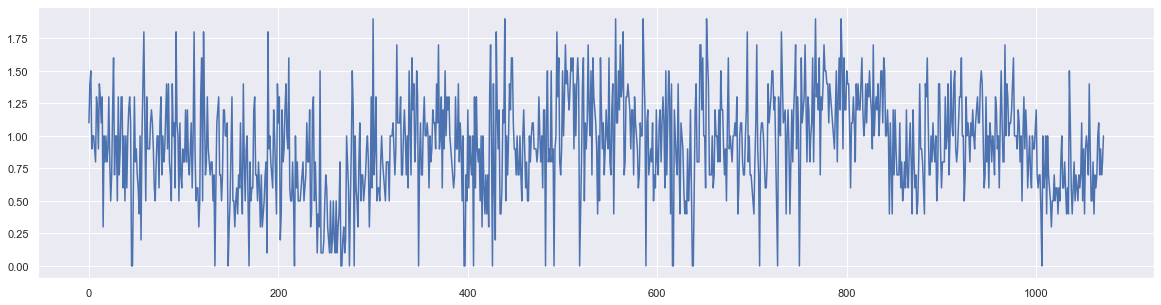

In [106]:
roi_y['ROI'].plot(figsize=(20,5))

In [107]:
# 시계열 예측시도

In [108]:
a = roi_y[["Date", "ROI"]]

In [109]:
a.columns = ["ds", "y"]

In [110]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality = True)
m.fit(a);

In [111]:
future = m.make_future_dataframe(periods=180)
forcast = m.predict(future)

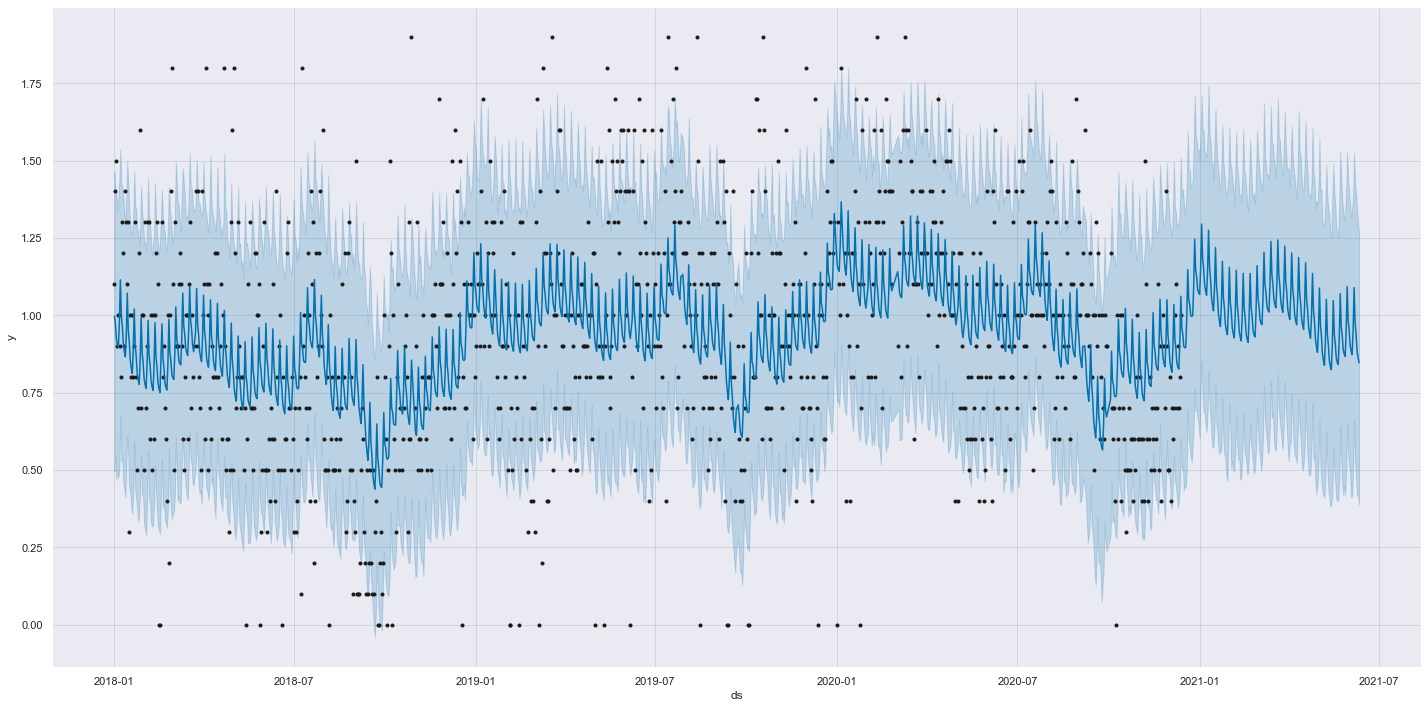

In [112]:
m.plot(forcast, figsize=(20,10));

In [113]:
#trend와 seasonal data 추출

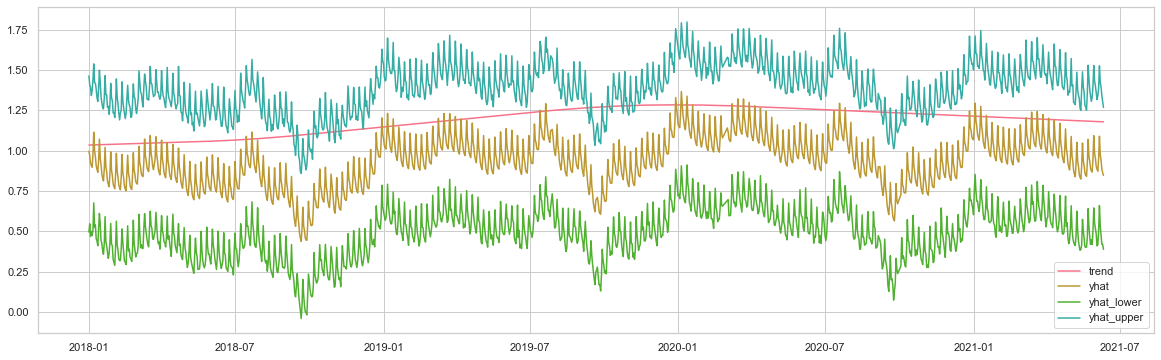

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(20,6))
for each in ['trend', 'yhat', 'yhat_lower', 'yhat_upper']:
    plt.plot(forcast['ds'], forcast[each], label=each)
    
plt.legend(loc='best')
plt.show()

In [115]:
# trend를 중심으로

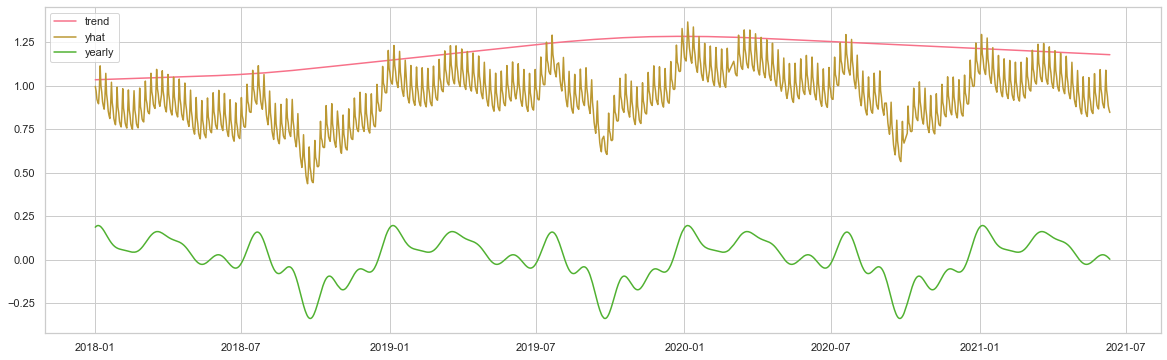

In [116]:
plt.figure(figsize=(20,6))
for each in ['trend', 'yhat', 'yearly']:
    plt.plot(forcast['ds'], forcast[each], label=each)
    
plt.legend(loc='best')
plt.show()

In [117]:
# 시계열분석에서는 componets분석이 중요

In [ ]:
m.plot_components(forcast, figsize=(20,12));